## <h1>Lesson 2. Regression analysis: How Much Is Your Car Worth?</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>...</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>...</li>
    </ul>
</li>
</ul>


In [1]:
import pandas as pd

cars = pd.read_csv('cars.csv')
cars.head()

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 18 columns):
Price          804 non-null float64
Mileage        804 non-null int64
Cylinder       804 non-null int64
Doors          804 non-null int64
Cruise         804 non-null int64
Sound          804 non-null int64
Leather        804 non-null int64
Buick          804 non-null int64
Cadillac       804 non-null int64
Chevy          804 non-null int64
Pontiac        804 non-null int64
Saab           804 non-null int64
Saturn         804 non-null int64
convertible    804 non-null int64
coupe          804 non-null int64
hatchback      804 non-null int64
sedan          804 non-null int64
wagon          804 non-null int64
dtypes: float64(1), int64(17)
memory usage: 113.1 KB


<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

In [3]:
# Put the command (or commands) here that would give answer to the above question.
import matplotlib.pyplot as plt

cars.plot(kind='scatter',x='Mileage',y='Price',color='red')
plt.show()
# Yes, but the overall relationship isn't as strong as I would have expected. The relationship also appears to be influenced 
# by outliers (10 Cadillac convertables all with prices above $52,000). For these outliers, the negative linear relationship 
# between price and mileage appears to be more evident.

<Figure size 640x480 with 1 Axes>

In [4]:
print(cars[cars.Price>52000])

        Price  Mileage  Cylinder  Doors  Cruise  Sound  Leather  Buick  \
194  68566.19     6420         8      2       1      1        1      0   
195  70755.47      583         8      2       1      1        1      0   
196  52001.99    42691         8      2       1      1        1      0   
197  60567.55    23193         8      2       1      1        1      0   
198  63913.12    18200         8      2       1      1        1      0   
199  69133.73     7892         8      2       1      1        1      0   
200  66374.31    12021         8      2       1      1        1      0   
646  55639.09    31805         8      2       1      0        1      0   
647  65281.48    15600         8      2       1      1        1      0   
648  57154.44    29260         8      2       1      1        1      0   

     Cadillac  Chevy  Pontiac  Saab  Saturn  convertible  coupe  hatchback  \
194         1      0        0     0       0            1      0          0   
195         1      0        0

<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 

In [5]:
# Linear regression model:

import statsmodels.api as sm

# Set the target and features  
X = cars["Mileage"]
y = cars["Price"]
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y,X).fit()

# Show summary statistics for the model:
model.summary()

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     16.75
Date:                Wed, 08 May 2019   Prob (F-statistic):           4.68e-05
Time:                        16:23:14   Log-Likelihood:                -8527.8
No. Observations:                 804   AIC:                         1.706e+04
Df Residuals:                     802   BIC:                         1.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.476e+04    904.363     27.383      0.000     2.3e+04    2.65e+04
Mileage       -0.1725      0.042     -4.093      0.000      -0.255      -0.090
==============================================================================
Omnibus:                      236.450   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              605.297
Skew:                           1.522   Prob(JB):                    3.64e-132
Kurtosis:                       5.966   Cond. No.                     5.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [6]:
print(model.params.Mileage)

# On average, one additional mile on a car is expected to decrease its value by 17 cents.

-0.17252050260202165


<h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [7]:
print(model.params.const)
# On average, the expected value of a car with 0 miles is $24,764

24764.55899120203


<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

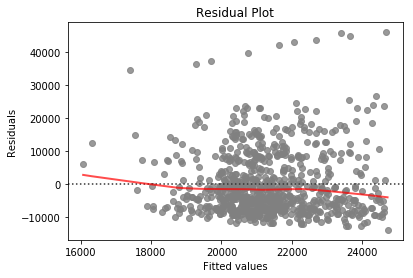

In [8]:
# Plot residuals
import seaborn as sns

sns.residplot(model.fittedvalues, model.resid, data=None, lowess=True, color='grey', line_kws={'color': 'red', 'lw': 2, 'alpha': 0.7})
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Fitted values')
plt.show()

# Again, there are some outliers in the data that are producing large residuals, but otherwise, there does not 
# appear to be much of a pattern to the residuals that would indicate a problem with the model.

<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

In [9]:
# Commands:

X = cars[["Mileage","Cylinder","Doors","Cruise","Sound","Leather"]]
y = cars["Price"]

X = sm.add_constant(X)

model_2 = sm.OLS(y,X).fit()

model_2.summary()

# Explanation:
# The MLR model is undoubtedly better and more accurate than than the simple linear regression. Looking at the R-sq value, 
# we see that the MLR model explains ~ 44% of the variation in car price compared with only 2% in the simple linear regression 
# model. In terms of accuracy, we can also see that the MSE of the MLR model is far smaller (5,796 vs 7,596).

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     106.8
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.23e-98
Time:                        16:23:14   Log-Likelihood:                -8298.9
No. Observations:                 804   AIC:                         1.661e+04
Df Residuals:                     797   BIC:                         1.664e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7323.1646   1770.837      4.135      0.000    3847.110    1.08e+04
Mileage       -0.1705      0.032     -5.352      0.000      -0.233      -0.108
Cylinder    3200.1246    202.983     15.765      0.000    2801.680    3598.570
Doors      -1463.3991    308.274     -4.747      0.000   -2068.525    -858.273
Cruise      6205.5113    651.463      9.525      0.000    4926.724    7484.298
Sound      -2024.4011    570.718     -3.547      0.000   -3144.690    -904.113
Leather     3327.1435    597.114      5.572      0.000    2155.041    4499.246
==============================================================================
Omnibus:                      145.941   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.863
Skew:                           1.098   Prob(JB):                     6.15e-57
Kurtosis:                       4.703   Cond. No.                     1.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
from sklearn import metrics
model_2_mse = sm.tools.eval_measures.mse(y, model_2.fittedvalues, axis=0)
model_1_mse = sm.tools.eval_measures.mse(y, model.fittedvalues, axis=0)

In [11]:
print(model_1_mse) 
print(model_2_mse)
print(model_2_mse < model_1_mse)

95591781.670083
54094348.47135444
True


<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

In [12]:
# Command(s):
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])], 
              index=X.columns)

# Comment on the result
#Values around 1 suggest that our features are not highly colinear in any way that would impact the model.

const       46.202290
Mileage      1.003421
Cylinder     1.167272
Doors        1.010767
Cruise       1.164616
Sound        1.045804
Leather      1.049990
dtype: float64

<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [13]:
# Commands:
chevy = pd.DataFrame([(30000, 4, 2, 1, 1, 1)], columns=["Mileage", "Cylinder", "Doors", "Cruise", "Sound", "Leather"])

chevy = sm.add_constant(chevy,has_constant='add')

model_2.predict(chevy)
# The expected price is $19,589.60

0    19589.606081
dtype: float64

<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

In [14]:
# Commands
chevy = pd.DataFrame([(30000,4,2,1,1,1,0,0,1,0,0,0,0,1,0,0,0)], columns=['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather',
                                                                     'Buick','Cadillac','Chevy','Pontiac','Saab','Saturn',
                                                                     'convertible','coupe','hatchback', 'sedan', 'wagon'])
X = cars.iloc[:,1:]
y = cars["Price"]

X = sm.add_constant(X)
chevy = sm.add_constant(chevy,has_constant='add')

model_3 = sm.OLS(y,X).fit()

chevy_prediction = model_3.predict(chevy)

print(chevy_prediction)

# Comments on problems
# As is, it is not possible to score the Chevy on features in the model that aren't known about that observation.
# Therefore to find an expected price for the Chevy, we need to inpute data. This is possible in this case because we know
# some things about the Chevy from the other features - namely the make of the car and that it has 2 doors which 
# tells us it is a coupe. Using imputed values for these features the expected price of the car is $12,144.94.


0    12144.938882
dtype: float64
